# Info
Name:  

    ORACLES_CRE_vs_AOD

Purpose:  

    Plot out results of the CRE vs. AOD for ORACLES
    Quantify the impact of overlying aerosol on cloud radiative effect
  
Input:

    None
  
Output:

    Figures
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-06-24
    Modified: 

# Prepare python environment

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
import load_utils as lu
import plotting_utils as pu
from path_utils import getpath
import hdf5storage as hs
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import scipy.stats as st

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [3]:
fp =getpath('ORACLES')

Return path named:  ORACLES /mnt/c/Users/sleblanc/Research/ORACLES/


# Load files

## Load the theory results

In [4]:
mat = hs.loadmat(fp+'rtm/ORACLES_theory_CRE_v1.mat')

In [5]:
mat.keys()

[u'star_aero_CRE',
 u'star_noaero_C',
 u'star_noaero_CRE',
 u'star_noaero_CRE_clear',
 u'star_aero_CRE_clear',
 u'star_aero_C']

In [16]:
mat['star_aero_CRE']['dn'].shape

(8, 6, 5, 5, 4, 3)

In [17]:
CRE_aero = mat['star_aero_CRE']['up'][:,:,:,:,:,2] -mat['star_aero_CRE_clear']['up'][:,:,:,:,:,2] 
CRE_noaero = mat['star_noaero_CRE']['up'][:,:,:,:,:,2] -mat['star_noaero_CRE_clear']['up'][:,:,:,:,:,2] 

In [18]:
rCRE_sur_aero = mat['star_aero_C'][:,:,:,:,:,0]/mat['star_aero_CRE_clear']['dn'][:,:,:,:,:,2]*100.0 
rCRE_sur_noaero = mat['star_noaero_C'][:,:,:,:,:,0]/mat['star_aero_CRE_clear']['dn'][:,:,:,:,:,2]*100.0 
rCRE_toa_aero = CRE_aero/mat['star_aero_CRE_clear']['dn'][:,:,:,:,:,2]*100.0 
rCRE_toa_noaero = CRE_noaero/mat['star_aero_CRE_clear']['dn'][:,:,:,:,:,2]*100.0

In [11]:
cod_arr = [1.0,2.5,5.0,7.5,10.0,12.5,15.0,20.0]
ref_arr = [2.0,5.0,7.5,10.0,12.5,15.0]

In [12]:
# set the range of ext, ssa, and asy to model at 500 nm
ext_arr = [0.05,0.1,0.15,0.2,0.3]
ssa_arr = [0.75,0.8,0.85,0.875,0.9]
asy_arr = [0.6,0.65,0.7,0.75]


In [14]:
len(cod_arr), len(ref_arr),len(ext_arr),len(ssa_arr),len(asy_arr)

(8, 6, 5, 5, 4)

In [15]:
mat['star_noaero_CRE_clear']['dn'].shape

(8, 6, 5, 5, 4, 3)

### Plot out the CRE dependences
Do some of the calculations to the data here

<IPython.core.display.Javascript object>


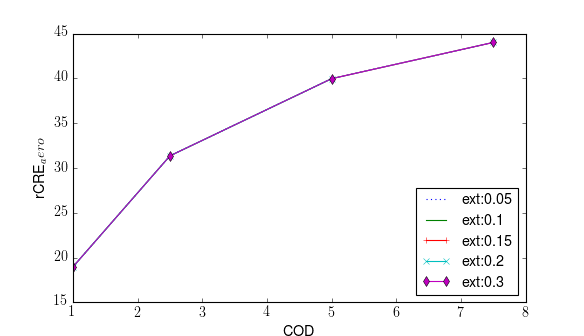

In [33]:
plt.figure()
plt.plot(cod_arr,rCRE_toa_aero[:,0,0,0,0],':',label='ext:{}'.format(ext_arr[0]))
plt.plot(cod_arr,rCRE_toa_aero[:,0,0,0,1],'-',label='ext:{}'.format(ext_arr[1]))
plt.plot(cod_arr,rCRE_toa_aero[:,0,0,0,2],'+-',label='ext:{}'.format(ext_arr[2]))
plt.plot(cod_arr,rCRE_toa_aero[:,0,0,0,3],'x-',label='ext:{}'.format(ext_arr[3]))
plt.plot(cod_arr,rCRE_toa_aero[:,0,0,0,0],'d-',label='ext:{}'.format(ext_arr[4]))
plt.xlabel('COD')
plt.ylabel('rCRE_aero')
plt.legend(loc=4)

## Load the lut with and without overlying aerosol

In [35]:
from load_utils import load_from_json

In [36]:
oa = hs.loadmat(fp+'model/v1_ORACLES_lut.mat')
wa = hs.loadmat(fp+'model/v2_ORACLES_lut.mat')

In [37]:
aero_oa = load_from_json(fp+'model/aero_save.txt')
aero_wa = load_from_json(fp+'model/aero_save_v2.txt')

In [38]:
oa.keys(), wa.keys()

([u'tau',
  u'rad',
  u'sza',
  u'irr_dn_diff',
  u'irr_dn',
  u'zout',
  u'wvl',
  u'phase',
  u'ref',
  u'irr_up'],
 [u'tau',
  u'rad',
  u'sza',
  u'irr_dn_diff',
  u'irr_dn',
  u'zout',
  u'wvl',
  u'phase',
  u'ref',
  u'irr_up'])

In [39]:
aero_oa

{u'asy': array([[0.68328872, 0.66672784, 0.64227709, 0.62344345, 0.62167625,
         0.62605761, 0.62786658, 0.6320782 , 0.52784278],
        [0.68328872, 0.66672784, 0.64227709, 0.62344345, 0.62167625,
         0.62605761, 0.62786658, 0.6320782 , 0.52784278]]),
 u'disort_phase': False,
 u'expand_hg': True,
 u'ext': array([[0.18817546, 0.16828887, 0.12297602, 0.07998438, 0.04323721,
         0.035     , 0.03277363, 0.02493016, 0.015     ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ]]),
 u'ssa': array([[0.88708406, 0.8821453 , 0.87309964, 0.8612953 , 0.84643443,
         0.84020162, 0.8378846 , 0.82512145, 0.79110621],
        [0.88708406, 0.8821453 , 0.87309964, 0.8612953 , 0.84643443,
         0.84020162, 0.8378846 , 0.82512145, 0.79110621]]),
 u'wvl_arr': [350.0,
  400.0,
  500.0,
  650.0,
  875.0,
  980.0,
  1020.0,
  1240.0,
  1710.0],
 u'z_arr': [2.0, 5.0]}

In [40]:
aero_wa

{u'asy': array([[0.713289  , 0.68328872, 0.66672784, 0.64227709, 0.62344345,
         0.62167625, 0.62605761, 0.62786658, 0.6320782 , 0.52784278,
         0.427843  , 0.377843  ],
        [0.713289  , 0.68328872, 0.66672784, 0.64227709, 0.62344345,
         0.62167625, 0.62605761, 0.62786658, 0.6320782 , 0.52784278,
         0.427843  , 0.377843  ]]),
 u'disort_phase': False,
 u'expand_hg': True,
 u'ext': array([[0.238175  , 0.18817546, 0.16828887, 0.12297602, 0.07998438,
         0.04323721, 0.035     , 0.03277363, 0.02493016, 0.015     ,
         0.01      , 0.005     ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ]]),
 u'ssa': array([[0.917084  , 0.88708406, 0.8821453 , 0.87309964, 0.8612953 ,
         0.84643443, 0.84020162, 0.8378846 , 0.82512145, 0.79110621,
         0.761106  , 0.721106  ],
        [0.917084  , 0.88708406, 0.8821453 , 0.87309964, 0.8612953

In [41]:
oa['sza']

array([18., 37., 46., 53., 57., 61., 64., 66., 68., 69., 71., 72., 73.,
       74., 75.])

In [42]:
oa['rad'].shape

(2, 1302, 3, 34, 29, 15)

In [48]:
oa['sza'].shape, oa['tau'].shape, oa['zout'], oa['phase'], oa['ref'].shape, oa['wvl'].shape

((15,), (29,), [0.2, 1.5, 100.0], ['wc', 'ic'], (34,), (1302,))

In [49]:
oa['ref']

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 17., 19., 21., 23., 25., 27., 29., 30., 33., 35., 38., 40.,
       43., 45., 48., 50., 53., 55., 58., 60.])

In [50]:
oa['tau']

array([  0.1 ,   0.2 ,   0.3 ,   0.5 ,   0.75,   1.  ,   1.5 ,   2.  ,
         2.5 ,   3.  ,   4.  ,   5.  ,   6.  ,   7.  ,   8.  ,   9.  ,
        10.  ,  12.5 ,  15.  ,  17.5 ,  20.  ,  25.  ,  30.  ,  35.  ,
        40.  ,  50.  ,  60.  ,  80.  , 100.  ])

In [69]:
def plot_greys(fig=None,ax=None):
    " Plotting of grey regions that indicates the different wavelenght regions where the parameters are defined. "
    cl = '#DDDDDD'
    plt.axvspan(1000,1077,color=cl) #eta1
    plt.axvspan(1192,1194,color=cl) #eta2
    plt.axvspan(1492,1494,color=cl) #eta3
    plt.axvspan(1197,1199,color=cl); plt.axvspan(1235,1237,color=cl);  #eta4
    plt.axvspan(1248,1270,color=cl) #eta5
    plt.axvspan(1565,1644,color=cl) #eta6
    plt.axvspan(1000,1050,color=cl) #eta7
    plt.axvspan(1493,1600,color=cl) #eta8
    plt.axvspan(1000,1077,color=cl) #eta9
    plt.axvspan(1200,1300,color=cl) #eta10
    plt.axvspan(530 ,610 ,color=cl) #eta11
    plt.axvspan(1039,1041,color=cl) #eta12
    plt.axvspan(999 ,1001,color=cl); plt.axvspan(1064,1066,color=cl);  #eta13
    plt.axvspan(599 ,601 ,color=cl); plt.axvspan(869 ,871 ,color=cl);  #eta14
    plt.axvspan(1565,1634,color=cl); #eta15
    

<IPython.core.display.Javascript object>


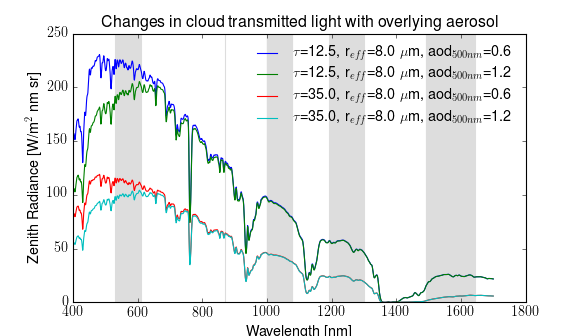

In [74]:
plt.figure()
plt.plot(oa['wvl'],oa['rad'][0,:,0,6,17,1],label='$\\tau$={t}, r$_{{eff}}$={r} $\\mu$m, aod$_{{500nm}}$={a:1.1f}'.format(t=oa['tau'][17],r=oa['ref'][6],a=0.6))
plt.plot(wa['wvl'],wa['rad'][0,:,0,6,17,1],label='$\\tau$={t}, r$_{{eff}}$={r} $\\mu$m, aod$_{{500nm}}$={a:1.1f}'.format(t=wa['tau'][17],r=wa['ref'][6],a=1.2))
plt.plot(oa['wvl'],oa['rad'][0,:,0,6,23,1],label='$\\tau$={t}, r$_{{eff}}$={r} $\\mu$m, aod$_{{500nm}}$={a:1.1f}'.format(t=oa['tau'][23],r=oa['ref'][6],a=0.6))
plt.plot(wa['wvl'],wa['rad'][0,:,0,6,23,1],label='$\\tau$={t}, r$_{{eff}}$={r} $\\mu$m, aod$_{{500nm}}$={a:1.1f}'.format(t=wa['tau'][23],r=wa['ref'][6],a=1.2))

plt.legend(loc=1,frameon=False)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Zenith Radiance [W/m$^2$ nm sr]')
plt.title('Changes in cloud transmitted light with overlying aerosol')
plt.axvspan(400,1800,color='white')
plot_greys()
plt.savefig(fp+'plot/Aerosol_above_cloud_model_spectra.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


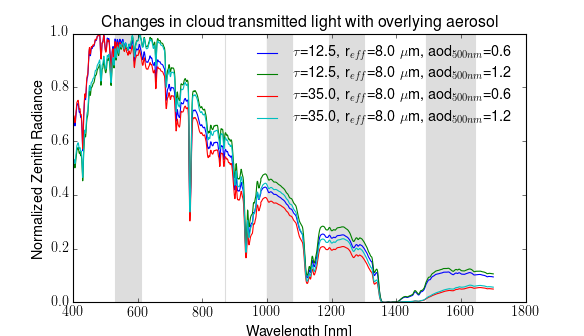

In [75]:
plt.figure()
plt.plot(oa['wvl'],oa['rad'][0,:,0,6,17,1]/max(oa['rad'][0,:,0,6,17,1]),label='$\\tau$={t}, r$_{{eff}}$={r} $\\mu$m, aod$_{{500nm}}$={a:1.1f}'.format(t=oa['tau'][17],r=oa['ref'][6],a=0.6))
plt.plot(wa['wvl'],wa['rad'][0,:,0,6,17,1]/max(wa['rad'][0,:,0,6,17,1]),label='$\\tau$={t}, r$_{{eff}}$={r} $\\mu$m, aod$_{{500nm}}$={a:1.1f}'.format(t=wa['tau'][17],r=wa['ref'][6],a=1.2))
plt.plot(oa['wvl'],oa['rad'][0,:,0,6,23,1]/max(oa['rad'][0,:,0,6,23,1]),label='$\\tau$={t}, r$_{{eff}}$={r} $\\mu$m, aod$_{{500nm}}$={a:1.1f}'.format(t=oa['tau'][23],r=oa['ref'][6],a=0.6))
plt.plot(wa['wvl'],wa['rad'][0,:,0,6,23,1]/max(wa['rad'][0,:,0,6,23,1]),label='$\\tau$={t}, r$_{{eff}}$={r} $\\mu$m, aod$_{{500nm}}$={a:1.1f}'.format(t=wa['tau'][23],r=wa['ref'][6],a=1.2))


plt.legend(loc=1,frameon=False)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized Zenith Radiance')
plt.title('Changes in cloud transmitted light with overlying aerosol')
plt.axvspan(400,1800,color='white')
plot_greys()
plt.savefig(fp+'plot/Aerosol_above_cloud_model_spectra_norm.png',dpi=600,transparent=True)

# Plotting
Present some fo the early plots here